In [21]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RepeatedKFold, StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
data_train  = pd.read_csv("alt_maccsfp.csv")

In [3]:
data_train.describe()

,ALT,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
count,97.000000,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0
mean,46.987113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.618557,0.958763,0.711340,0.639175,0.958763,0.876289,0.917526,0.824742,0.989691,0.0
std,45.510157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.488264,0.199871,0.455493,0.482735,0.199871,0.330962,0.276515,0.382162,0.101535,0.0
min,1.510000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,29.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,36.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
75%,49.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,273.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 167 entries, ALT to MACCSFP166
dtypes: float64(167)
memory usage: 126.7 KB


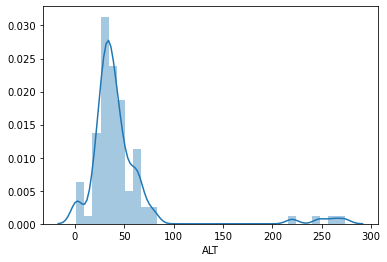

In [5]:
sns.distplot(data_train['ALT']);


In [6]:
data_train.columns[data_train.sum()==0]

Index(['MACCSFP1', 'MACCSFP2', 'MACCSFP3', 'MACCSFP4', 'MACCSFP5', 'MACCSFP6',
       'MACCSFP7', 'MACCSFP8', 'MACCSFP9', 'MACCSFP10', 'MACCSFP12',
       'MACCSFP13', 'MACCSFP14', 'MACCSFP15', 'MACCSFP17', 'MACCSFP18',
       'MACCSFP19', 'MACCSFP20', 'MACCSFP21', 'MACCSFP27', 'MACCSFP31',
       'MACCSFP32', 'MACCSFP33', 'MACCSFP35', 'MACCSFP39', 'MACCSFP40',
       'MACCSFP41', 'MACCSFP44', 'MACCSFP51', 'MACCSFP55', 'MACCSFP58',
       'MACCSFP59', 'MACCSFP60', 'MACCSFP61', 'MACCSFP64', 'MACCSFP67',
       'MACCSFP68', 'MACCSFP69', 'MACCSFP73', 'MACCSFP101', 'MACCSFP166'],
      dtype='object')

In [7]:
# usunąłem puste kolumny oraz wartości odstające

data_train.drop(data_train.loc[data_train.ALT > 100].index, inplace=True)
data_train.drop(columns=data_train.columns[data_train.sum() == 0], inplace=True)
data_train.reset_index(drop=True, inplace=True)



In [8]:
data_train

,ALT,MACCSFP11,MACCSFP16,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP28,MACCSFP29,...,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165
0,32.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,37.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,2.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,44.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,33.70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
89,38.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
90,32.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
91,53.55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


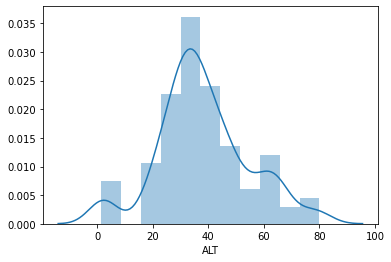

In [9]:
sns.distplot(data_train['ALT']);

In [10]:
y = data_train['ALT']
del data_train['ALT']
X = data_train.values
y = y.values

# podzielenie danych na dwa zbiory testowy i treningowy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(74, 124)
(19, 124)


In [11]:
param_grid = {'alpha':[0.0001,0.001, 0.005, 0.01,0.05,0.1,0.5,1]}

In [12]:
skf = StratifiedKFold(n_splits=5, random_state=44, shuffle=True)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=44)
# nie dziala :/ 

In [13]:
rskf.get_n_splits(X, y)

10

In [14]:
kf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=666)

In [15]:
kf.get_n_splits(X, y)

10

In [16]:
grid_cv_lr = GridSearchCV(Lasso(), param_grid, scoring='r2', cv=kf, return_train_score=True, verbose=1000)
grid_cv_lr_fit = grid_cv_lr.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.774, test=0.159), total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] alpha=0.0001 ....................................................
[CV] ... alpha=0.0001, score=(train=0.832, test=-0.341), total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.737, test=0.286), total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.766, test=0.058), total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 926.5741867268789, tolerance: 1.8880564952542374
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574.0234042987197, tolerance: 1.8402261223728813
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788.9911781048193, tolerance: 1.388587119322034
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

[CV] ..... alpha=0.001, score=(train=0.737, test=0.308), total=   0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s remaining:    0.0s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.766, test=0.106), total=   0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s remaining:    0.0s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.715, test=0.426), total=   0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s remaining:    0.0s
[CV] alpha=0.001 .....................................................
[CV] .... alpha=0.001, score=(train=0.747, test=-0.805), total=   0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s remaining:    0.0s
[CV] alpha=0.001 .....................................................
[CV] .... alpha=0.001, score=(train=0.822, test=-0.043), total=   0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.8672888893375, tolerance: 1.9153326291525425
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.9393102773647, tolerance: 1.4046137033333332
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.03079698107013, tolerance: 1.8880564952542374
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

[CV] ..... alpha=0.005, score=(train=0.692, test=0.151), total=   0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s remaining:    0.0s
[CV] alpha=0.01 ......................................................
[CV] ..... alpha=0.01, score=(train=0.774, test=-0.302), total=   0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.3s remaining:    0.0s
[CV] alpha=0.01 ......................................................
[CV] ..... alpha=0.01, score=(train=0.832, test=-0.669), total=   0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.3s remaining:    0.0s
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.737, test=0.296), total=   0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s remaining:    0.0s
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.766, test=0.080), total=   0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.546542986093755, tolerance: 1.8123772240677969
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.76705615249512, tolerance: 1.672274345762712
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.571488890383534, tolerance: 1.9153326291525425
  positive)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

[CV] ....... alpha=0.1, score=(train=0.704, test=0.602), total=   0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.5s remaining:    0.0s
[CV] alpha=0.1 .......................................................
[CV] ...... alpha=0.1, score=(train=0.737, test=-0.646), total=   0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.5s remaining:    0.0s
[CV] alpha=0.1 .......................................................
[CV] ...... alpha=0.1, score=(train=0.808, test=-0.017), total=   0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.5s remaining:    0.0s
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.711, test=0.455), total=   0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.5s remaining:    0.0s
[CV] alpha=0.1 .......................................................
[CV] ...... alpha=0.1, score=(train=0.783, test=-0.929), total=   0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59

In [17]:
print(grid_cv_lr_fit.best_score_)
print(grid_cv_lr_fit.best_params_)

-0.0024921219442198494
{'alpha': 0.5}


In [18]:
lasso_model = Lasso(alpha =  0.5)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
Y_pred_train = lasso_model.predict(X_train)
print("Accuracy R2 --> ", lasso_model.score(X_train, y_train))

Accuracy R2 -->  0.5867471218608031


In [20]:
Y_pred_test = lasso_model.predict(X_test)
print("Accuracy R2 --> ", lasso_model.score(X_test, y_test))

Accuracy R2 -->  0.39941973560008226


In [22]:
param_grid_rfr={"n_estimators": [1, 5, 10, 20, 30, 40, 50, 100],
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split": [2, 4, 8, 16],
            "bootstrap": [True, False],
}

In [23]:
grid_RandomForestRegressor = GridSearchCV(RandomForestRegressor(), param_grid_rfr, scoring='r2', cv=kf, n_jobs=-1, return_train_score=True, verbose=1000)

grid_RandomForestRegressor.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pi


Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    2.1s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.1s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch com

Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    2.7s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done  7

Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.5s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    3.6s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.4s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.4s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).



Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    5.2s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    5.3s
Pickling array (shape=(74, 124), dtype=float64).

[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    6.4s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    6.4s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).



Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:    7.2s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:    7.2s
Pickling array (shape=(74, 124), dtype=float64).

Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    8.0s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:    8.1s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).


Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    8.9s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:    8.9s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).


Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:   10.0s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   10.0s


[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:   10.8s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   10.9s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).


Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   11.7s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jo

Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:   12.7s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:   12.7s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).


[Parallel(n_jobs=-1)]: Done 980 tasks      | elapsed:   13.6s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:   13.7s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).


[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:   14.5s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1052 tasks      | elapsed:   14.5

[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   15.3s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:   15.4s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32)

Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1212 tasks      | elapsed:   16.3s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_j

Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1300 tasks      | elapsed:   17.3s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1304 tasks      | elapsed:   17.4s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32)


Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1384 tasks      | elapsed:   18.1s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   18.1s
Pickling array (shape=(74, 124), dtype=float64

Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:   18.7s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed:   18.8s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32)

[Parallel(n_jobs=-1)]: Done 1532 tasks      | elapsed:   19.3s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   19.3s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32)

Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:   20.0s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_j

[Parallel(n_jobs=-1)]: Done 1684 tasks      | elapsed:   20.6s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   20.6s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32)


Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).[Parallel(n_jobs=-1)]: Done 1780 tasks      | elapsed:   21.5s

Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   21.5s
Pickling array (shape=(74, 124), dtype=float64

Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(14,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   22.1s
Pickling array (shape=(74, 124), dtype=float64).
Pickling array (shape=(74,), dtype=float64).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(15,), dtype=int32).
Pickling array (shape=(74, 124), dtype=float64).
Pickling arr

[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   22.9s finished


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=666),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=...
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                           

In [24]:
print(grid_RandomForestRegressor.best_score_)
print(grid_RandomForestRegressor.best_params_)

0.1906230745039324
{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 40}


In [26]:
rfr_model = RandomForestRegressor(bootstrap =  False, max_features = 'log2', min_samples_split = 8, n_estimators = 40)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
Y_pred_train_rfr = rfr_model.predict(X_train)
print("Accuracy R2 --> ", rfr_model.score(X_train, y_train))

Accuracy R2 -->  0.7094246551169259


In [35]:
Y_pred_test_rfr = rfr_model.predict(X_test)
print("Accuracy R2 --> ", rfr_model.score(X_test, y_test))

Accuracy R2 -->  0.549211499156768
